# Import libraries
Vamos usar as seguintes bibliotecas:
- pandas
- seaborn
- matplot lib

In [2]:
# Bibliotecas a serem utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import boxplot
import matplotlib.pyplot as plt

# Dataset
Vamos importar o dataset 'nps' e visualizar como está

In [11]:
# Import do dataset
nps = pd.read_parquet('../data/stage/3m/customers_nps_churn_palive.parquet')

In [12]:
# Visualização das variáveis que compõe o dataset
nps.info(max_cols=174)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5061
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   consumer_id                     5062 non-null   int64  
 1   role_id                         5062 non-null   int64  
 2   cpf                             5062 non-null   float64
 3   email                           5062 non-null   object 
 4   birthdate                       5062 non-null   object 
 5   city                            4517 non-null   object 
 6   state                           4517 non-null   object 
 7   phonenumber                     5062 non-null   float64
 8   created_at                      5062 non-null   object 
 9   updated_at                      5062 non-null   object 
 10  eou_synced_at                   799 non-null    object 
 11  last_activity_date              5062 non-null   object 
 12  completed_at                    44

# Inspect atributes
Vamos observar o comportamento das nossas variáveis de interesse:
- p_churn
- nps
- p_currently_alive

In [13]:
nps['p_churn']

0       0.162971
1       0.000000
2       0.108373
3       0.000000
4       0.327837
          ...   
5057    0.186263
5058    0.000000
5059    0.140662
5060    0.155244
5061    0.230408
Name: p_churn, Length: 5062, dtype: float64

Perceba que 'p_churn' é uma variável que contém a probabilidade de saída de um cliente da base de dados. 
Logo, é intuitivo deduzir que seu intervalo seja entre 0 e 1, por ser uma probabilidade.

In [14]:
nps['nps'].value_counts()

1    3265
0    1797
Name: nps, dtype: int64

Perceba que 'nps' é a nossa target, porém, posteriormente haverá um novo passo:Categorizar essa variável. 
Critérios: Se 'nps' < 8, será atribuído o valor de 0 a ela. Se 'nps'> 7, será atribuído o valor de 1 a ela.
Onde temos as seguintes características: 0 = não indicaria, 1 = indicaria

In [15]:
nps['p_currently_alive']

0       0.985849
1            NaN
2       0.989534
3       0.653534
4       0.929038
          ...   
5057    0.995479
5058         NaN
5059    0.975727
5060    0.992677
5061    0.980924
Name: p_currently_alive, Length: 5062, dtype: float64

Perceba que assim como 'p_churn' está variável trata-se de um probabilidade, portanto, é intuitivo que seu intervalo seja entre 0 e 1.

# Mapping target 
Como citado acima, devemos fazer com que nossa target possua etiquetas binárias: 0 e 1

In [8]:
nps['nps']  = nps['nps'] .map({
                                   0:0,
                                   1:0,
                                   2:0,
                                   3:0,
                                   4:0,
                                   5:0,
                                   6:0,
                                   7:0,
                                   8:1,
                                   9:1,
                                   10:1
                             },
                             na_action=None)

In [9]:
nps['nps'].value_counts()

0    5062
Name: nps, dtype: int64

Perceba que agora  nossa target é binária! Além do mais, é uma target desbalanceada.

# Plots
Nessa parte, o intuito é fazermos diversas plotagens para que possamos ver qual trás mais interpretatibilidade aos dados e quais são mais interessantes. Lembrando que possuimos as seguintes duvidas:
- o churn e p alive são discriminantes para o nps?
- com churn alto necessariamente vou ter um nps baixo?
Logo, o intuito dos gráficos é encontrarmos os que melhor respondem a essas dúvidas

In [57]:
# Categorical scatterplots

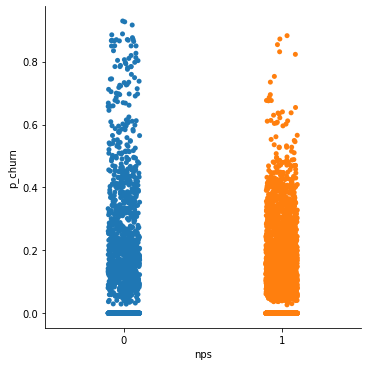

In [16]:
# Este plot está descrito no seguinte link: https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x= 'nps', y="p_churn", data=nps, hue = 'nps')

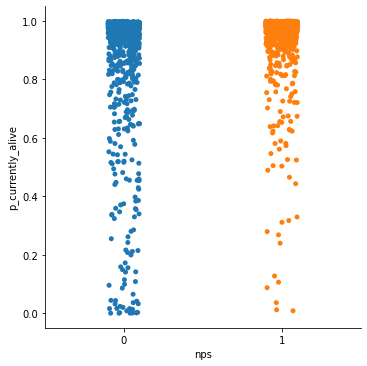

In [17]:
sns.catplot(x= 'nps', y="p_currently_alive", data=nps[nps['p_currently_alive'].notna()], hue = 'nps')

- (Primeiro gráfico) Quando comparamos o primeiro gráfico, entre 'p_churn' VS 'nps', percebemos que há algumas lacunas na target 1.
Onde, se o 'p_churn' for alto (começa em 0.6, mas ficam frequentes perto do 0.8) a tendência é a pessoa não recomendar, dado que a target 1 é recomendar.
- (Segundo gráfico) Quando nos deparamos com o segundoo, há poucas lacunas não preenchidas, o que pode ser inconclusivo.
**Concluindo**: Por estas visualizações, vemos que o 'p_churn' pode interferirna indicação, mas em uma etapa especifica, onde a probabilidade é maior ou superior a 0.6 .

In [18]:
# Boxplot

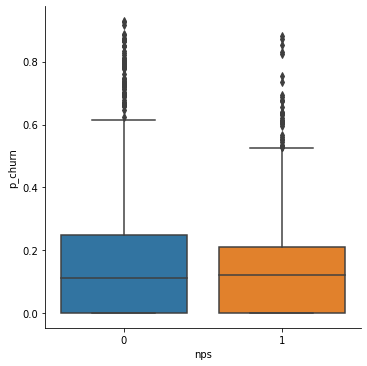

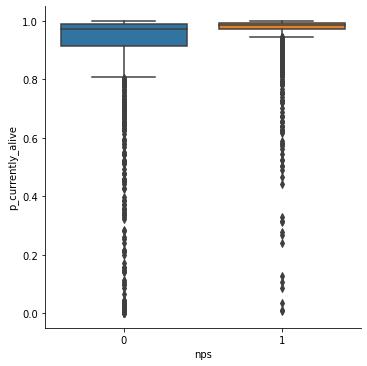

In [19]:
sns.catplot(x="nps", y="p_churn", kind="box", data=nps),
sns.catplot(x="nps", y="p_currently_alive", kind="box", data=nps[nps['p_currently_alive'].notna()])

Perceba que estes boxplot possuem uma representação gráfica de como os dados estão dispersos (mas sera mostrado posteriormente).
- (Primeiro Boxplot: p_churn): Os dados estão centrados próximo a mediana, entre 0.15 e 0.4 de probabilidade
- (Segundo Boxplot: p_currently_alive): Os dados estão todos centrados próximo a 1.0 de probabilidade

In [20]:
# KDE plot: Plot da densidade

<AxesSubplot:xlabel='p_churn', ylabel='Density'>

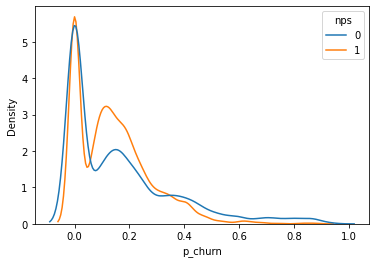

In [21]:
sns.kdeplot(data=nps, x="p_churn", hue="nps", 
            common_norm=False, bw_method=0.15)

Densidade da variável 'p_churn': Ela aparentemente segue a mesma distribuição, mas note que na mediana de ambos, o ápice das pessoas que indicariam o app é superior em relação a de quem não indicaria

<AxesSubplot:xlabel='p_churn', ylabel='Density'>

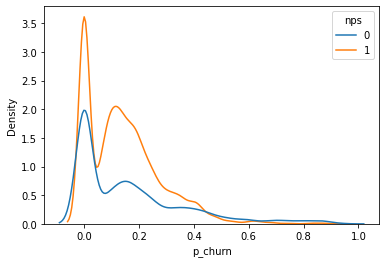

In [22]:
sns.kdeplot(data=nps, x="p_churn", hue="nps", bw_method=0.15)

Este é o mesmo plot acima, porém, sem o commom_norm. Suponho que seja por normalizar ou não, mas precisariamos de um Shapiro Test para poder tomar a decisão correta.

<AxesSubplot:xlabel='p_currently_alive', ylabel='Density'>

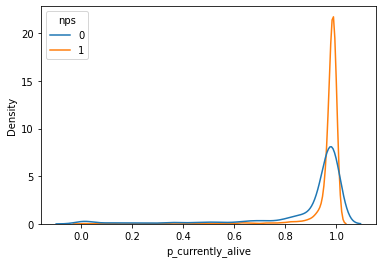

In [23]:
sns.kdeplot(data=nps[nps['p_currently_alive'].notna()], x="p_currently_alive", hue="nps", 
            common_norm=False, bw_method=0.15)

Como citado acima, na sesão dos Boxplots... Perceba que a distribuição está próxima ao valor de 1.0

In [24]:
# KDE plots. São plots referentes a um estudo de predição: Pode ser encontrado neste link 'https://stats.stackexchange.com/questions/448679/is-there-a-name-for-this-visualization-technique-binary-classification'

In [25]:
p_churn_0 = nps[nps['nps']==0]
p_churn_1 = nps[nps['nps']==1]

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

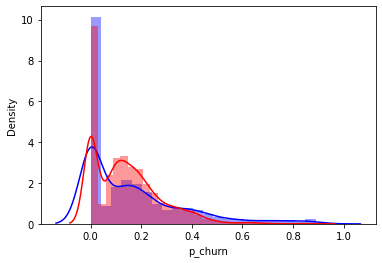

In [28]:
sns.distplot(p_churn_0['p_churn'], color='blue')
sns.distplot(p_churn_1['p_churn'], color='red')
plt.save('teste.png')


In [32]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

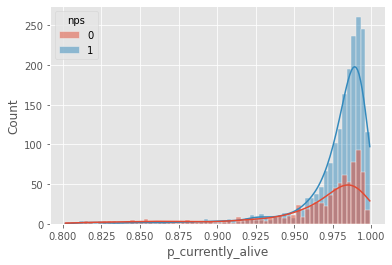

In [52]:
import matplotlib
matplotlib.style.use('ggplot')
histplot = sns.histplot(data=nps[nps['p_currently_alive']>0.8], x="p_currently_alive", hue="nps", kde=True)

fig = histplot.get_figure()
fig.savefig('customer-heath-score-palive-distplot.png') 

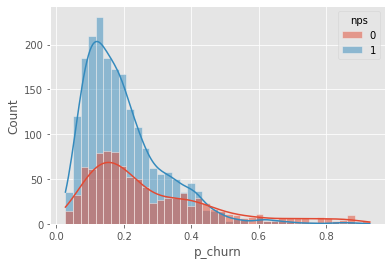

In [46]:
import matplotlib
matplotlib.style.use('ggplot')
histplot = sns.histplot(data=nps[nps['p_churn']>0], x="p_churn", hue="nps", kde=True)

fig = histplot.get_figure()
fig.savefig('customer-heath-score-distplot.png') 

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


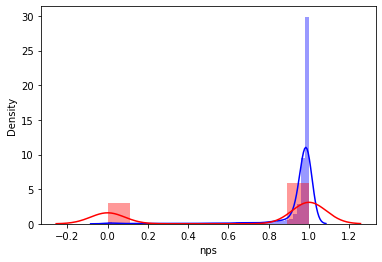

In [20]:
sns.distplot(nps['p_currently_alive'], color='blue')
sns.distplot(nps['nps'], color='red')
plt.show() 

In [65]:
# violinos: https://seaborn.pydata.org/examples/grouped_violinplots.html

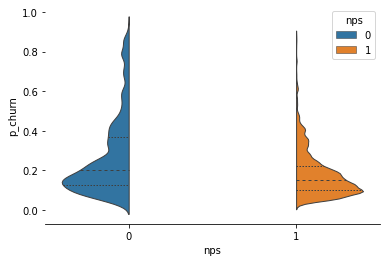

In [66]:
# 'p_churn' vs nps
sns.violinplot(data=nps, x="nps", y="p_churn", hue="nps",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

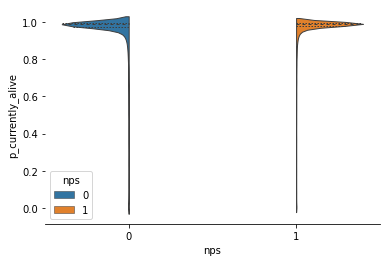

In [69]:
# 'p_currently_alive' vs nps
sns.violinplot(data=nps, x="nps", y="p_currently_alive", hue="nps",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

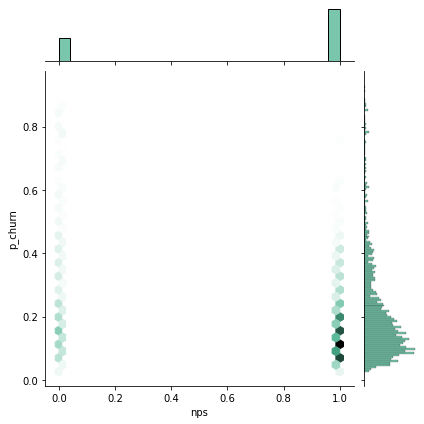

In [82]:
# hexbin :https://seaborn.pydata.org/examples/hexbin_marginals.html
# p_churn VS nps
sns.jointplot(x=nps['nps'], y=nps['p_churn'], kind="hex", color="#4CB391")

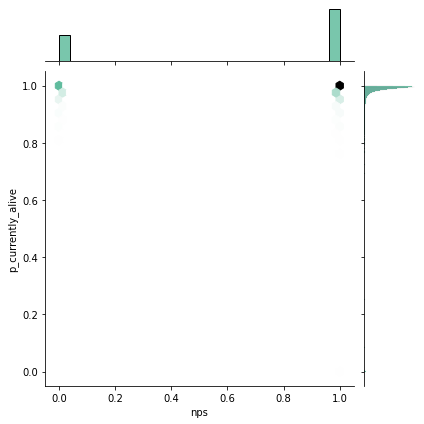

In [83]:
# p_churn VS p_currently_alive
sns.jointplot(x=nps['nps'], y=nps['p_currently_alive'], kind="hex", color="#4CB391")

KeyboardInterrupt: 

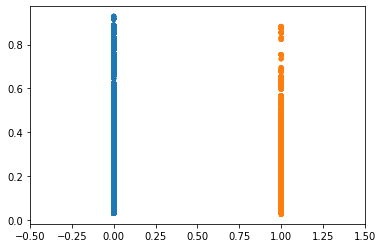

In [86]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=nps, x="nps", y="p_churn", hue="nps")
ax.set(ylabel="")